In [ ]:
pip install finance-datareader

In [ ]:
pip install -U finance-datareader

Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.6/dist-packages (0.9.20)


In [ ]:
import FinanceDataReader as fdr
df = fdr.DataReader(symbol='005930', start='2020-02-19') # 삼성전자, 2020.02.19~현재
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-19,59800,60400,59400,60200,12951496,0.006689
2020-02-20,60700,61300,59600,60000,14591924,-0.003322
2020-02-21,58800,59800,58500,59200,13777393,-0.013333
2020-02-24,57400,58100,56800,56800,25627537,-0.040541
2020-02-25,56200,58000,56200,57900,23885408,0.019366
...,...,...,...,...,...,...
2021-02-15,83800,84500,83300,84200,23529706,0.031863
2021-02-16,84500,86000,84200,84900,20483100,0.008314
2021-02-17,83900,84200,83000,83200,18307735,-0.020024


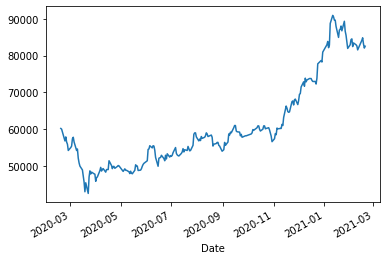

In [ ]:
df['Close'].plot();

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import os
import json
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
base_dir = "/content/gdrive/MyDrive"
file_nm = "df.xlsx"
xlxs_dir = os.path.join(base_dir, file_nm)


In [ ]:
#base_dir = "C:/Users/sun17/Desktop"
#file_nm = "df.xlsx"
#xlxs_dir = os.path.join(base_dir,file_nm)



In [ ]:
df.to_excel(xlxs_dir, # directory and file name to write

            sheet_name = 'Sheet1',

            na_rep = 'NaN',

            float_format = "%.2f",

            header = True,

            #columns = ["group", "value_1", "value_2"], # if header is False

            index = True,

            index_label = "id",

            startrow = 1,

            startcol = 1,

            #engine = 'xlsxwriter',

            freeze_panes = (2, 0)

            )




In [ ]:
cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import pandas as pd

#xlsx.to_excel('df.xlsx',index=True)









NameError: ignored

In [ ]:
Data= pd.read_excel('df.xlsx')
print(Data)



     Unnamed: 0           Unnamed: 1  ... Unnamed: 6 Unnamed: 7
0           NaN                   id  ...     Volume     Change
1           NaN  2020-02-19 00:00:00  ...   12951496       0.01
2           NaN  2020-02-20 00:00:00  ...   14591924          0
3           NaN  2020-02-21 00:00:00  ...   13777393      -0.01
4           NaN  2020-02-24 00:00:00  ...   25627537      -0.04
..          ...                  ...  ...        ...        ...
245         NaN  2021-02-15 00:00:00  ...   23529706       0.03
246         NaN  2021-02-16 00:00:00  ...   20483100       0.01
247         NaN  2021-02-17 00:00:00  ...   18307735      -0.02
248         NaN  2021-02-18 00:00:00  ...   21327683      -0.01
249         NaN  2021-02-19 00:00:00  ...   25469274       0.01

[250 rows x 8 columns]


In [ ]:
#xlsx.to_csv('df',index=False)



NameError: ignored

In [ ]:
 import pandas as pd
 dataframe = pd.read_csv("df", delimiter=',', header=None, skiprows=1, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Change'])

In [ ]:
print(dataframe)

                              Open   High    Low  Close    Volume  Change
0   NaN id                    Open   High    Low  Close    Volume  Change
1   NaN 2020-02-19 00:00:00  59800  60400  59400  60200  12951496    0.01
2   NaN 2020-02-20 00:00:00  60700  61300  59600  60000  14591924       0
3   NaN 2020-02-21 00:00:00  58800  59800  58500  59200  13777393   -0.01
4   NaN 2020-02-24 00:00:00  57400  58100  56800  56800  25627537   -0.04
...                            ...    ...    ...    ...       ...     ...
245 NaN 2021-02-15 00:00:00  83800  84500  83300  84200  23529706    0.03
246 NaN 2021-02-16 00:00:00  84500  86000  84200  84900  20483100    0.01
247 NaN 2021-02-17 00:00:00  83900  84200  83000  83200  18307735   -0.02
248 NaN 2021-02-18 00:00:00  83200  83600  82100  82100  21327683   -0.01
249 NaN 2021-02-19 00:00:00  82300  82800  81000  82600  25469274    0.01

[250 rows x 6 columns]


In [ ]:
dataframe.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [ ]:
#for column in df:
#  print(column)

In [ ]:
TEST_SIZE = 36

In [ ]:
train = Data[:-TEST_SIZE]
test = Data[-TEST_SIZE:]

In [ ]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change']

In [ ]:
#feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']



train_feature = train[['Open', 'High', 'Low', 'Volume']]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
#((143, 20, 4), (36, 20, 4))



KeyError: ignored

In [ ]:
test_feature = test[['Open', 'High', 'Low', 'Volume']]
test_label = test[label_cols]

test_feature.shape, test_label.shape

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
#((30, 20, 4), (30, 1))

((30, 20, 4), (30, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(10,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )

model.add(Dense(1))

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=20,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[early_stop, checkpoint])

Epoch 1/20
8/8 [==============================] - 1s 34ms/step - loss: 461113144.8889 - val_loss: 341127680.0000

Epoch 00001: val_loss improved from inf to 341127680.00000, saving model to model/tmp_checkpoint.h5
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 308267221.3333 - val_loss: 316501856.0000

Epoch 00002: val_loss improved from 341127680.00000 to 316501856.00000, saving model to model/tmp_checkpoint.h5
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 286668250.6667 - val_loss: 326688992.0000

Epoch 00003: val_loss did not improve from 316501856.00000
Epoch 4/20
8/8 [==============================] - 0s 11ms/step - loss: 344184522.6667 - val_loss: 360842464.0000

Epoch 00004: val_loss did not improve from 316501856.00000
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 307755505.7778 - val_loss: 354694016.0000

Epoch 00005: val_loss did not improve from 316501856.00000
Epoch 6/20
8/8 [=========================

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(30, 1)

In [ ]:
from matplotlib import pyplot as plt

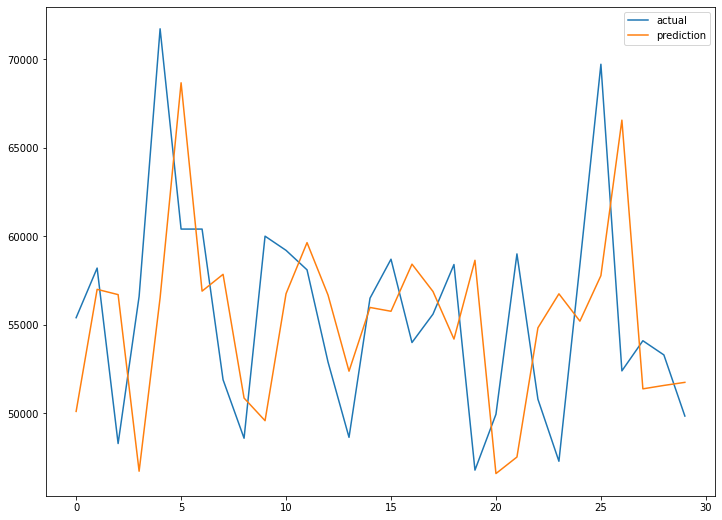

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')

plt.legend()
plt.show()